### **1. DOWNLOAD REQUIREMENTS**

In [24]:
!pip install pandas
!pip install Sastrawi

### **2. CRAWLING DATA FROM X**

In [ ]:
twitter_auth_token = 'your auth token inspect element'

In [ ]:
# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

!node -v

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,224 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packa

In [ ]:
# Crawl Data

filename = 'jokowi_status_1705118532588228988.csv'
twitter_thread_url = 'https://x.com/jokowi/status/1705118532588228988'
limit = 10000

# Set timeout to 1 hour (3600 seconds)
!timeout 3600s npx --yes tweet-harvest@latest -o {filename} -l {limit} --token {twitter_auth_token} --thread {twitter_thread_url}

⠙⠹⠸⠼⠴⠦Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...



Your tweets saved to: /content/tweets-data/jokowi_status_1705118532588228988.csv
Total tweets saved: 10

-- Scrolling... (1) (2)

Your tweets saved to: /content/tweets-data/jokowi_status_1705118532588228988.csv
Total tweets saved: 20


Your tweets saved to: /content/tweets-data/jokowi_status_1705118532588228988.csv
Total tweets saved: 30

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/jokowi_status_1705118532588228988.csv
Total tweets saved: 40

-- Scrolling... (1)

Your tweets saved to: /content/tweets-data/jokowi_status_1705118532588228988.csv
Total tweets saved: 50


Your tweets 

### **3. GET COMMENT ONLY**


In [ ]:
import csv
import re

# Fungsi untuk mengekstrak teks setelah @jokowi
def extract_jokowi_text(text):
    match = re.search(r'@jokowi\s*([^"]*)', text)  # Menangkap teks setelah @jokowi hingga kutip dua pertama
    if match:
        return match.group(1).strip()
    return ""

# Membaca file CSV dan memproses setiap baris
input_filename = 'merge_jokowi_status_1641_raw_data.csv'
output_filename = 'merge_jokowi_status_1641_raw_data_only_comments.csv'

with open(input_filename, 'r', encoding='utf-8') as csvfile:
    lines = csvfile.readlines()

# Menyimpan hasil dalam file CSV baru
with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(["only_comments"])  # Menulis header CSV

    for line in lines:
        # Menghapus tanda kutip di depan dan belakang jika ada
        line = line.strip().strip('"')

        # Mengekstrak teks setelah @jokowi
        text = extract_jokowi_text(line)

        # Menghapus teks setelah kutip dua pertama
        if text:
            text = text.split('"')[0].strip()
            csv_writer.writerow([text])  # Menulis setiap baris hasil

print(f"Hasil telah disimpan dalam {output_filename}")


In [ ]:
import pandas as pd

# Membaca file CSV yang telah disimpan
df = pd.read_csv('merge_jokowi_status_1641_raw_data_only_comments.csv')

# Menampilkan DataFrame
print(df)


                                          only_comments
0        Di tanam satu pohon yg di tebang jutaan pohon.
1     Semoga ada Mawar juga agar Ibu Kota Nusantara ...
2              Bu 9 0 eu km lo P y min young l Ugygoy L
3                                               Bu oh u
4     Luar biasa.. Berarti dulu sebelum ada IKN ngga...
...                                                 ...
1618    Si Zulhas yg ga tau diri itu msh dibawa2 jg ya.
1619  Itu pak bahlil sama pak ridwan kamil kerjanya ...
1620  Sekelas bajingan kepingin minta didemo begitu ...
1621             Ingat dosa Pak https://t.co/jklOyDqUlN
1622  Lanjutkan proyekLiarIKN m&amp  PP no 12/2023 a...

[1623 rows x 1 columns]


### **4. GET CLEAN COMMENT**
- Menghapus retweet
- Menghapus mention
- Menghapus URL
- Menghapus hashtag
- Menghapus karakter khusus dan tanda baca
- Mengubah menjadi huruf kecil

In [33]:
import pandas as pd
import re

# Membaca file CSV
input_file = 'merge_jokowi_status_1641_raw_data_only_comments.csv'
output_file = 'merge_jokowi_status_1641_clean_comments.csv'

# Load dataset
data = pd.read_csv(input_file)

# Fungsi untuk membersihkan teks
def clean_tweet(tweet):
    tweet = re.sub(r'RT @[\w_]+:', '', tweet)  # Menghapus retweet
    tweet = re.sub(r'@\w+', '', tweet)  # Menghapus mention
    tweet = re.sub(r'http\S+', '', tweet)  # Menghapus URL
    tweet = re.sub(r'\d+', '', tweet)      # Hapus angka
    tweet = re.sub(r'#[\w_]+', '', tweet)  # Menghapus hashtag
    tweet = re.sub(r'[^\w\s]', '', tweet)  # Menghapus karakter khusus dan tanda baca
    tweet = tweet.lower()  # Mengubah menjadi huruf kecil
    return tweet

# Menerapkan fungsi pembersihan ke kolom 'only_comments'
data['cleaned_comments'] = data['only_comments'].apply(clean_tweet)

# Menghapus duplikat
data.drop_duplicates(subset='cleaned_comments', inplace=True)

# Menyimpan hasil ke file CSV baru
data.to_csv(output_file, columns=['cleaned_comments'], index=False)

### **5. NORMALISASI**

In [34]:
import csv
import re
import time
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm  # Untuk visualisasi progres

# Fungsi untuk membaca file dan mengembalikan daftar kata
def load_word_list(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        return set(line.strip() for line in file.readlines())

# Fungsi untuk memuat slang dictionary dari file CSV
def load_slang_dict(file_path):
    slang_dict = {}
    with open(file_path, "r", encoding="ISO-8859-1") as file:  # Ganti encoding
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            slang_dict[row[0]] = row[1]
    return slang_dict

# Fungsi normalisasi tanpa mengganti slang
def normalisasi(text, stopwords):
    # 1. Lowercase
    text = text.lower()

    # 2. Bersihkan teks (hapus tanda baca dan angka)


    # 3. Tokenisasi
    tokenized = text.split()

    # 4. Stopword Removal
    filtered = [word for word in tokenized if word not in stopwords]

    # 5. Stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed = [stemmer.stem(word) for word in filtered]

    return ' '.join(stemmed)

# Load data dari file eksternal
stopwords = load_word_list("combined_stop_words.txt")

# Baca data dari CSV (input file path)
input_file_path = "merge_jokowi_status_1641_clean_comments.csv"
output_file_path = "normalized_comments.csv"

# Baca CSV dan lakukan normalisasi dengan progres bar
with open(input_file_path, encoding="ISO-8859-1") as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')  # Ganti delimiter sesuai CSV Anda
    rows = list(readCSV)  # Mengambil semua data ke dalam list untuk memudahkan estimasi

    with open(output_file_path, "w", encoding="utf-8", newline='') as output_csv:
        writer = csv.writer(output_csv)
        writer.writerow(["Original Comment", "Normalized Comment"])  # Header

        start_time = time.time()  # Waktu mulai
        for i, row in tqdm(enumerate(rows), total=len(rows), desc="Normalisasi Komentar", unit="baris"):
            # Ambil komentar dari CSV (anggap komentar ada di kolom pertama)
            text_asli = row[0]

            # Lakukan normalisasi
            normalized_text = normalisasi(text_asli, stopwords)

            # Tulis hasil normalisasi ke file CSV
            writer.writerow([text_asli, normalized_text])

            # Estimasi waktu
            if i % 100 == 0 and i != 0:  # Setiap 100 baris
                elapsed_time = time.time() - start_time  # Waktu yang sudah berlalu
                remaining_time = elapsed_time / (i + 1) * (len(rows) - i - 1)  # Estimasi waktu sisa
                print(f"Estimasi waktu sisa: {remaining_time / 60:.2f} menit")

        end_time = time.time()  # Waktu selesai
        total_time = end_time - start_time  # Total waktu yang dibutuhkan
        print(f"Normalisasi selesai. Waktu total: {total_time / 60:.2f} menit")
        print(f"Hasil disimpan di {output_file_path}")


Normalisasi Komentar:   7%|▋         | 103/1539 [00:44<03:54,  6.13baris/s]

Estimasi waktu sisa: 10.48 menit


Normalisasi Komentar:  13%|█▎        | 200/1539 [01:20<04:50,  4.61baris/s]

Estimasi waktu sisa: 8.98 menit


Normalisasi Komentar:  19%|█▉        | 300/1539 [02:10<33:23,  1.62s/baris]

Estimasi waktu sisa: 8.93 menit


Normalisasi Komentar:  26%|██▌       | 401/1539 [02:56<09:02,  2.10baris/s]

Estimasi waktu sisa: 8.33 menit


Normalisasi Komentar:  33%|███▎      | 501/1539 [03:50<11:05,  1.56baris/s]

Estimasi waktu sisa: 7.95 menit


Normalisasi Komentar:  39%|███▉      | 602/1539 [04:33<06:54,  2.26baris/s]

Estimasi waktu sisa: 7.10 menit


Normalisasi Komentar:  46%|████▌     | 701/1539 [05:18<10:07,  1.38baris/s]

Estimasi waktu sisa: 6.35 menit


Normalisasi Komentar:  52%|█████▏    | 801/1539 [06:08<05:17,  2.32baris/s]

Estimasi waktu sisa: 5.66 menit


Normalisasi Komentar:  59%|█████▊    | 901/1539 [07:08<09:50,  1.08baris/s]

Estimasi waktu sisa: 5.06 menit


Normalisasi Komentar:  65%|██████▍   | 1000/1539 [07:46<01:35,  5.63baris/s]

Estimasi waktu sisa: 4.18 menit


Normalisasi Komentar:  72%|███████▏  | 1101/1539 [08:24<01:36,  4.55baris/s]

Estimasi waktu sisa: 3.34 menit


Normalisasi Komentar:  78%|███████▊  | 1200/1539 [09:04<03:17,  1.72baris/s]

Estimasi waktu sisa: 2.55 menit


Normalisasi Komentar:  85%|████████▍ | 1302/1539 [09:42<01:22,  2.88baris/s]

Estimasi waktu sisa: 1.78 menit


Normalisasi Komentar:  91%|█████████ | 1402/1539 [10:15<00:24,  5.60baris/s]

Estimasi waktu sisa: 1.01 menit


Normalisasi Komentar:  98%|█████████▊| 1501/1539 [10:56<00:07,  5.36baris/s]

Estimasi waktu sisa: 0.28 menit


Normalisasi Komentar: 100%|██████████| 1539/1539 [11:15<00:00,  2.28baris/s]

Normalisasi selesai. Waktu total: 11.26 menit
Hasil disimpan di normalized_comments.csv


### **6. LABELING**

In [37]:
# ini masih di skip nomor 4 dan 5 diatas

import pandas as pd
from transformers import pipeline
from tqdm import tqdm  # Import library untuk progress bar
import time

# Load pre-trained sentiment analysis pipeline
sentiment_model = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Membaca file normalized_comments.csv
input_file = 'normalized_comments.csv'
data = pd.read_csv(input_file)

# Pastikan semua data adalah string dan tidak kosong
data['Original Comment'] = data['Original Comment'].astype(str)
data = data[data['Original Comment'].str.strip() != ""]  # Hapus baris kosong

# Tambahkan progress bar
tqdm.pandas(desc="Processing Sentiment")

# Tambahkan label menggunakan model dengan progress bar
start_time = time.time()
data['sentimen'] = data['Original Comment'].progress_apply(
    lambda x: sentiment_model(x)[0]['label'] if isinstance(x, str) and x.strip() != "" else "tidak valid"
)
end_time = time.time()

# Simpan ke file
output_file = 'labeled_comments_advanced.csv'
data.to_csv(output_file, index=False, encoding='utf-8')

# Tampilkan durasi waktu
elapsed_time = end_time - start_time
print(f"File {output_file} berhasil dibuat dalam waktu {elapsed_time:.2f} detik!")


Processing Sentiment: 100%|██████████| 1537/1537 [03:15<00:00,  7.85it/s]

File labeled_comments_advanced.csv berhasil dibuat dalam waktu 195.77 detik!


### **7. VISUALISASI**
- Word Cloud
- Pie Chart
- Bar Chart

In [43]:
import pandas as pd

# Membaca file CSV
input_file = 'labeled_comments_advanced.csv'
data = pd.read_csv(input_file)

# Menampilkan nama kolom yang ada
print("Nama kolom dalam DataFrame:", data.columns)

# Menampilkan beberapa baris pertama untuk memastikan formatnya
print(data.head())


Nama kolom dalam DataFrame: Index(['Original Comment', 'Normalized Comment', 'sentimen'], dtype='object')
                                    Original Comment  \
0                                   cleaned_comments   
1      di tanam satu pohon yg di tebang jutaan pohon   
2  semoga ada mawar juga agar ibu kota nusantara ...   
3           bu 9 0 eu km lo p y min young l ugygoy l   
4                                            bu oh u   

                                  Normalized Comment  sentimen  
0                                   cleaned comments  negative  
1                      tanam pohon tebang juta pohon   neutral  
2  moga mawar ibu kota nusantara indah semerbak w...  positive  
3                  bu eu km p y min young l ugygoy l   neutral  
4                                               bu u  negative  


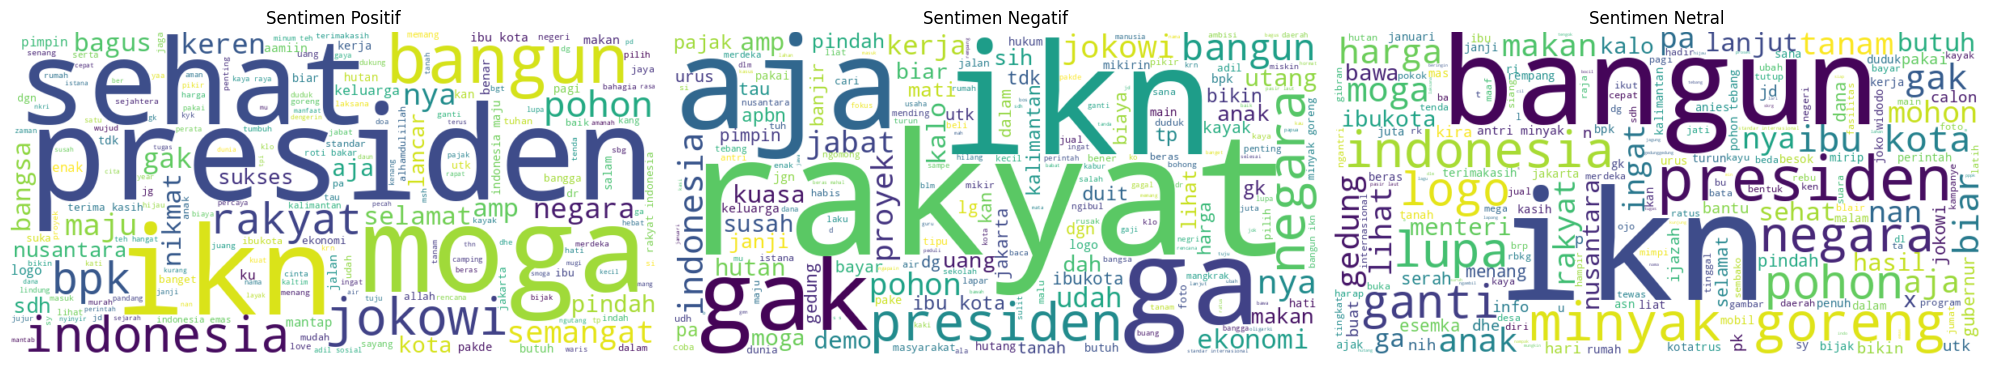

In [51]:
# # WORD CLOUD

# import matplotlib.pyplot as plt
# from wordcloud import WordCloud

# # Pastikan semua komentar adalah string
# data['Normalized Comment'] = data['Normalized Comment'].astype(str)

# # Menggabungkan semua komentar untuk word cloud
# all_comments = ' '.join(data['Normalized Comment'])

# # Membuat word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# # Menampilkan word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud dari Komentar')
# plt.show()

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Membaca file CSV
file_path = "labeled_comments_advanced.csv"
data = pd.read_csv(file_path)

# Hapus baris header kedua jika ada
data = data.iloc[1:]

# Pastikan semua komentar adalah string
data['Normalized Comment'] = data['Normalized Comment'].astype(str)

# Filter data berdasarkan sentimen
positive_comments = ' '.join(data[data['sentimen'] == 'positive']['Normalized Comment'])
negative_comments = ' '.join(data[data['sentimen'] == 'negative']['Normalized Comment'])
neutral_comments = ' '.join(data[data['sentimen'] == 'neutral']['Normalized Comment'])

# Membuat WordCloud untuk setiap sentimen
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_comments)

# Menampilkan WordCloud
fig, axes = plt.subplots(1, 3, figsize=(20, 7))

# Word Cloud Positif
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Sentimen Positif')

# Word Cloud Negatif
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Sentimen Negatif')

# Word Cloud Netral
axes[2].imshow(wordcloud_neutral, interpolation='bilinear')
axes[2].axis('off')
axes[2].set_title('Sentimen Netral')

plt.tight_lay out()
plt.show()


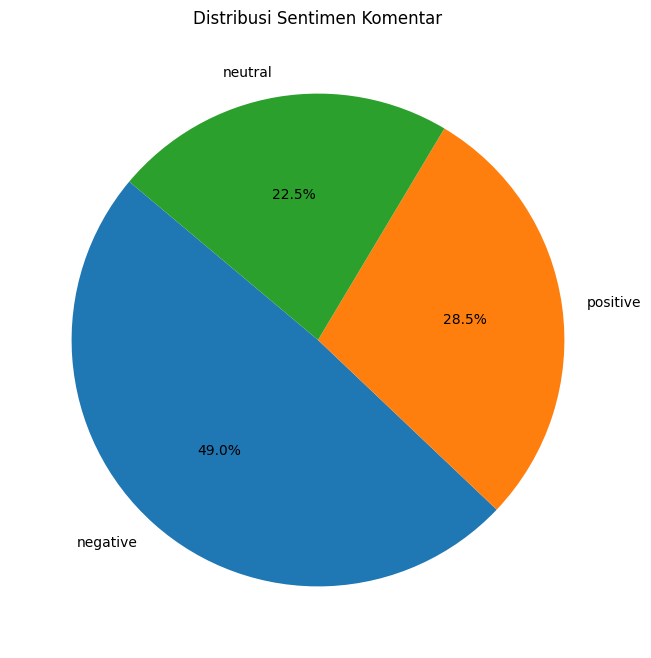

In [52]:
# PIE CHART

import matplotlib.pyplot as plt

# Menghitung distribusi sentimen
sentiment_counts = data['sentimen'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Sentimen Komentar')
plt.show()


<ipython-input-64-f7a1547db34b>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


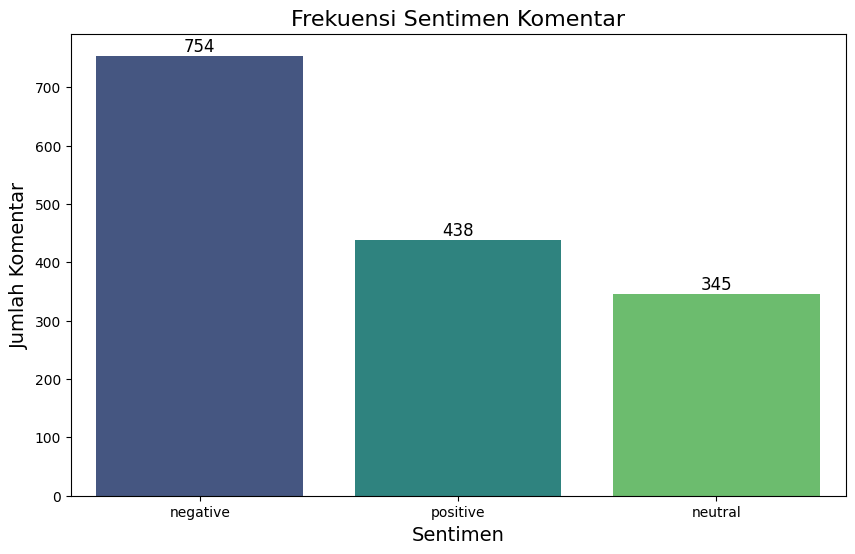

In [64]:
# # BAR CHART

# import seaborn as sns

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i,y[i]//2,y[i],ha = 'center')

# # Menghitung distribusi sentimen
# sentiment_counts = data['sentimen'].value_counts()

# # Membuat bar chart
# plt.figure(figsize=(10, 6))
# sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# addlabels(x=sentiment_counts.index, y=sentiment_counts.values)
# plt.title('Frekuensi Sentimen Komentar')
# plt.xlabel('Sentimen')
# plt.ylabel('Jumlah Komentar')
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung distribusi sentimen
sentiment_counts = data['sentimen'].value_counts()

# Mapping angka ke label sentimen
sentiment_labels = {0: 'negative', 1: 'neutral', 2: 'positive'}
sentiment_counts.index = sentiment_counts.index.map(sentiment_labels)

# Membuat bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Menampilkan nilai pada setiap batang
for i, value in enumerate(sentiment_counts.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=12)

# Menambahkan judul dan label
plt.title('Frekuensi Sentimen Komentar', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Jumlah Komentar', fontsize=14)
plt.show()

### **8. TRAINING**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Encode label sentimen menjadi angka
label_encoder = LabelEncoder()
data['sentimen'] = label_encoder.fit_transform(data['sentimen'])

# Isi nilai NaN di kolom 'Normalized Comment' dengan string kosong
data['Normalized Comment'] = data['Normalized Comment'].fillna('')

# Split data menjadi train dan test
X = data['Normalized Comment']  # Fitur (komentar)
y = data['sentimen']  # Target (label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Transform teks menjadi fitur numerik
vectorizer = TfidfVectorizer(max_features=5000)  # Pilih jumlah fitur sesuai kebutuhan
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Buat model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Latih model
svm_model.fit(X_train_tfidf, y_train)

# Evaluasi model
y_pred = svm_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Prediksi komentar baru
new_comments = ["IKN jelek", "Saya dukung IKN, bagus sekali semoga jaya!", "tidak suka", "Saya makan nasi goreng"]
new_comments_tfidf = vectorizer.transform(new_comments)
predictions = svm_model.predict(new_comments_tfidf)

# Decode prediksi ke label asli
decoded_predictions = label_encoder.inverse_transform(predictions)

# Mapping angka ke label sentimen
sentiment_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}

# Tampilkan hasil prediksi dengan label teks
for comment, sentiment in zip(new_comments, predictions):
    sentiment_label = sentiment_mapping[sentiment]
    print(f"Komentar: \"{comment}\" -> Sentimen: {sentiment_label}")


Accuracy: 0.5886178861788618
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.86      0.70       302
           1       0.43      0.15      0.22       138
           2       0.65      0.47      0.54       175

    accuracy                           0.59       615
   macro avg       0.55      0.49      0.49       615
weighted avg       0.57      0.59      0.55       615

Komentar: "IKN jelek" -> Sentimen: negative
Komentar: "Saya dukung IKN, bagus sekali semoga jaya!" -> Sentimen: positive
Komentar: "tidak suka" -> Sentimen: negative
Komentar: "Saya makan nasi goreng" -> Sentimen: neutral
